# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata, mktestdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.00017, E_test is 0.01272
Average number of iterations is 39.


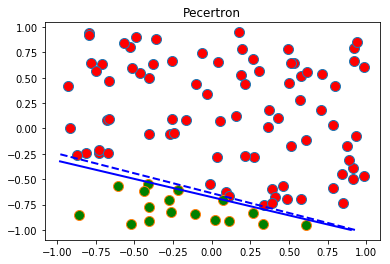

In [2]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 100 # number of test data

E_train = 0 # training error
E_test = 0  # testing error
sum_iter = 0 # sum of iterations
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, iters = perceptron(X, y)
    #print(w_g)
    # Compute training, testing error
    # training error 
    w_g = w_g.ravel()
    D = np.dot(w_g[1:].T,X)*y + w_g[0]*y
    for i in range(nTrain):
        if D[0][i] < 0:
            E_train = E_train + 1.
            
    # testing error
    x_test, y_test = mktestdata(nTest, w_f)
    D = np.dot(w_g[1:].T,x_test)*y_test + w_g[0]*y_test
    for i in range(nTest):
        if D[0][i] < 0:
            E_test = E_test + 1.
    
    # Sum up number of iterations
    sum_iter += iters

E_train /= nRep * nTrain
E_test /= nRep * nTest
avgIter = sum_iter / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.2413, E_test is 0.18847
Average number of iterations is 1000.


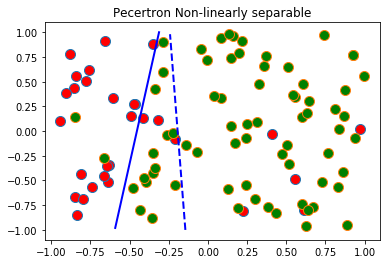

In [3]:
nTrain = 100 # number of training data

w_g, iters = perceptron(X, y)

E_train = 0 # training error
E_test = 0  # testing error
sum_iter = 0 # sum of iterations
nRep = 1000
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g, iters = perceptron(X, y)
    #print(w_g)
    # Compute training, testing error
    # training error 
    w_g = w_g.ravel()
    D = np.dot(w_g[1:].T,X)*y + w_g[0]*y
    for i in range(nTrain):
        if D[0][i] < 0:
            E_train = E_train + 1.
            
    # testing error
    x_test, y_test = mktestdata(nTest, w_f)
    D = np.dot(w_g[1:].T,x_test)*y_test + w_g[0]*y_test
    for i in range(nTest):
        if D[0][i] < 0:
            E_test = E_test + 1.
    
    # Sum up number of iterations
    sum_iter += iters

E_train /= nRep * nTrain
E_test /= nRep * nTest
avgIter = sum_iter / nRep
    

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(iters))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 0.03807, E_test is 0.0484


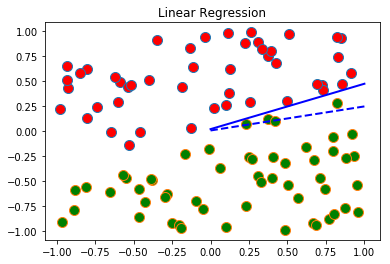

In [4]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 100

E_train = 0 # training error
E_test = 0 # test error

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    # Compute training, testing error
    # training error
    X = np.vstack((np.ones(nTrain).T,X))
    d = np.dot(w_g.T,X)*y
    for i in range(nTrain):
        if d[0][i] < 0:
            E_train += 1.
    
    # test error
    x_test, y_test = mktestdata(nTest, w_f)
    x_test = np.vstack((np.ones(nTest).T,x_test))
    d = np.dot(w_g.T, x_test)*y_test
    for i in range(nTest):
        if d[0][i] < 0:
            E_test += 1.
E_train /= nRep * nTrain
E_test /= nRep * nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))
X = X[1:,:]
plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.13171, E_test is 0.06049


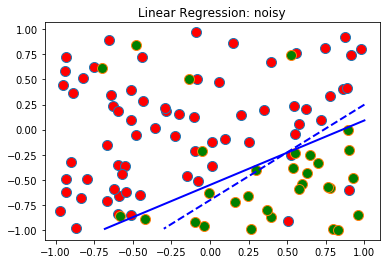

In [5]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 100

E_train = 0 # training error
E_test = 0 # test error
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y);
    # Compute training, testing error
    X = np.vstack((np.ones(nTrain).T,X))
    d = np.dot(w_g.T,X)*y
    for i in range(nTrain):
        if d[0][i] < 0:
            E_train += 1.
    
    # test error
    x_test, y_test = mktestdata(nTest, w_f)
    x_test = np.vstack((np.ones(nTest).T,x_test))
    d = np.dot(w_g.T, x_test)*y_test
    for i in range(nTest):
        if d[0][i] < 0:
            E_test += 1.
E_train /= nRep * nTrain
E_test /= nRep * nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
X = X[1:,:]
plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [6]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
# training error

E_train = 0
E_test = 0

nTrain = X.shape[1]
nTest = X_test.shape[1]

X = np.vstack((np.ones(nTrain).T,X))
d = np.dot(w.T,X)*y
for i in range(nTrain):
    if d[0][i] < 0:
        E_train += 1.
E_train /= nTrain

X_test = np.vstack((np.ones(nTest).T,X_test))
d = np.dot(w.T,X_test)*y_test
for i in range(nTest):
    if d[0][i] < 0:
        E_test += 1.
E_test /= nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X = X[1:,:]
X_test = X_test[1:,:]
X_t = np.vstack((X,X[0:1,:]*X[1:2,:],X[0:1,:]*X[0:1,:],X[1:2,:]*X[1:2,:]))  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.vstack((X_test,X_test[0:1,:]*X_test[1:2,:],X_test[0:1,:]*X_test[0:1,:],X_test[1:2,:]*X_test[1:2,:]))  # CHANGE THIS LINE TO DO TRANSFORMATION

w = linear_regression(X_t, y)
#Compute training, testing error
E_train = 0
E_test = 0
X_t = np.vstack((np.ones(nTrain).T,X_t))
d = np.dot(w.T,X_t)*y
for i in range(nTrain):
    if d[0][i] < 0:
        E_train += 1.
E_train /= nTrain

X_test_t = np.vstack((np.ones(nTest).T,X_test_t))
d = np.dot(w.T,X_test_t)*y_test
for i in range(nTest):
    if d[0][i] < 0:
        E_test += 1.
E_test /= nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))




E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.0875, E_test is 0.0921


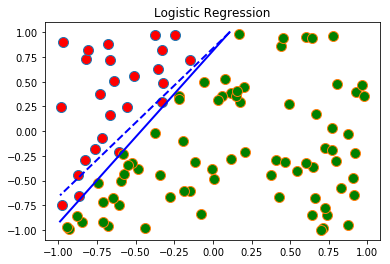

In [192]:
from logistic import logistic
# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 100
E_train = 0
E_test = 0

for j in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y)
    # Compute training, testing error
    # training error
    X = np.vstack((np.ones(nTrain).T,X))

    d = y*(1./(1+np.exp(1 + np.dot(-1*w_g.T,X)))-0.5)

    for i in range(nTrain):
        if d[0][i] < 0:
            E_train += 1.
    
    x_test,y_test = mktestdata(nTest,w_f)   
    x_test = np.vstack((np.ones(nTest).T,x_test))
    d = y_test*(1./(1+np.exp(1 + np.dot(-1*w_g.T,x_test)))-0.5)
    for i in range(nTest):
        if d[0][i] < 0:
            E_test += 1.

E_train /= nRep * nTrain
E_test /= nRep * nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))
X = X[1:,:]
plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

In [90]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    # Compute training, testing error
    X = np.vstack((np.ones(nTrain).T,X))

    d = y*(1./(1+np.exp(1 + np.dot(-1*w_g.T,X)))-0.5)

    for i in range(nTrain):
        if d[0][i] < 0:
            E_train += 1.
    
    x_test,y_test = mktestdata(nTest,w_f)   
    x_test = np.vstack((np.ones(nTest).T,x_test))
    d = y_test*(1./(1+np.exp(1 + np.dot(-1*w_g.T,x_test)))-0.5)
    for i in range(nTest):
        if d[0][i] < 0:
            E_test += 1.

E_train /= nRep * nTrain
E_test /= nRep * nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))
X = X[1:,:]
plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

NameError: name 'logistic' is not defined

## Part8: SVM

E_train is 0.0, E_test is 0.01063
Average number of support vectors is 2.999.


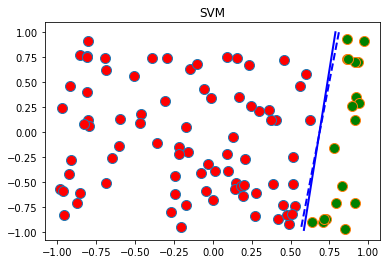

In [3]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 100

E_train = 0
E_test = 0

avgNum = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)

    w_g, num_sc = svm(X, y)
    X = np.vstack((np.ones(nTrain).T,X))
    # Compute training, testing error
    # training error
    d = y*np.dot(w_g.T,X)
    E_train += np.sum(d<0)
    
    # testing error
    x_test,y_test = mktestdata(nTest,w_f)   
    x_test = np.vstack((np.ones(nTest).T,x_test))
    d = y_test*np.dot(w_g.T,x_test)
    E_test += np.sum(d<0)
    
    # Sum up number of support vectors
    avgNum += num_sc

avgNum /= nRep * 1.
E_train /= nRep * nTrain * 1.
E_test /= nRep * nTest * 1.

print('E_train is {}, E_test is {}'.format(E_train, E_test))

print('Average number of support vectors is {}.'.format(avgNum))
X = X[1:,:]
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.